In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [12]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [13]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

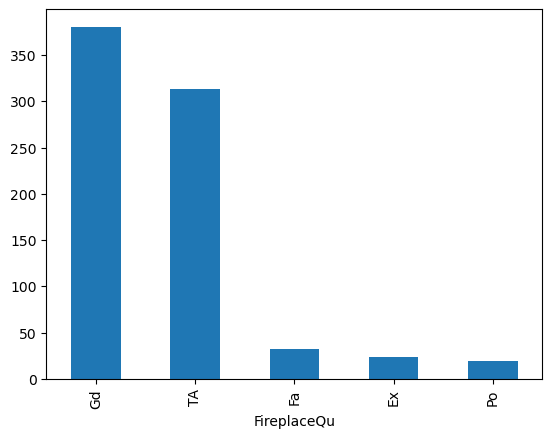

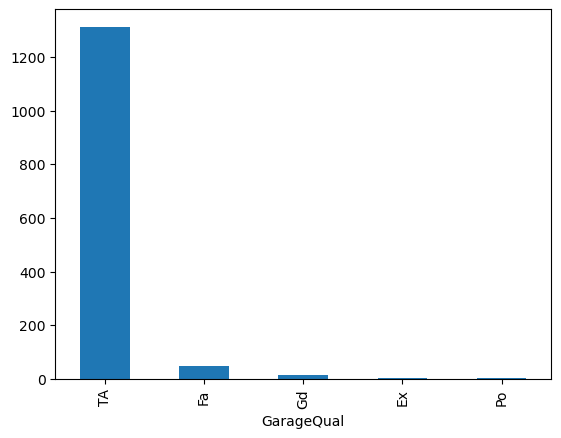

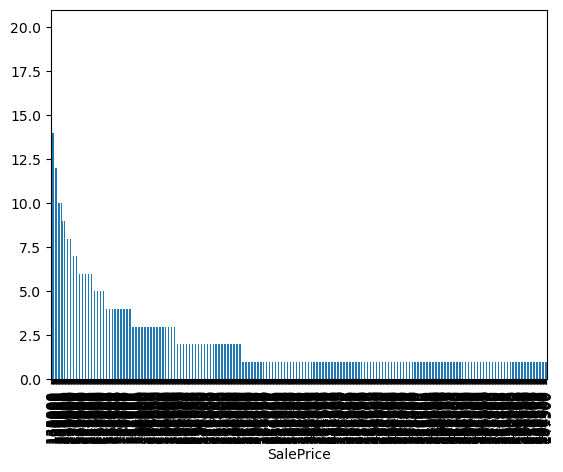

In [26]:
for col in df.columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[col].value_counts().plot(kind='bar',ax=ax)

In [28]:
df['GarageQual'].fillna('TA',inplace=True)

In [34]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

In [35]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [36]:
df['FireplaceQu'].fillna('Gd',inplace=True)

In [37]:
df.isnull().sum()

FireplaceQu    0
GarageQual     0
SalePrice      0
dtype: int64

In [38]:
df_new = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df_new.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [42]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

In [43]:
imputer1=SimpleImputer(strategy='most_frequent')
# temp=ColumnTransformer([
#     ('first',imputer1,[])
# ])


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [45]:
X_train = imputer1.fit_transform(X_train)
X_test = imputer1.transform(X_train)

c:\Users\aarsh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [48]:
imputer1.statistics_

array(['Gd', 'TA'], dtype=object)

**********

In [49]:
imputer2 = SimpleImputer(strategy='constant',fill_value='Missing')
X_train2 = imputer2.fit_transform(X_train)
X_test2 = imputer2.transform(X_train)

array([['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA']], dtype=object)